In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import json

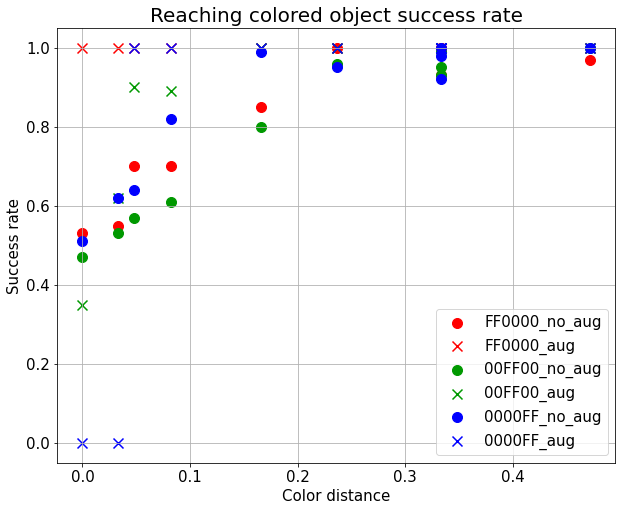

In [5]:
%matplotlib inline
plt.figure(0, figsize=(10, 8))

for color in ["FF0000", "00FF00", "0000FF"]:
    for aug_type in ("no_aug", "aug"):
        with open(f"../data/test_nn32_{color}_{aug_type}_model.json", "r") as f:
            x = json.load(f)
        tgt_color = np.array(x["target_color"])
        dit_colors = np.array(x["distractor_colors"])
        dist_color = np.linalg.norm(dit_colors - tgt_color, axis=1) / (3*255)
        acc = np.array(x['acc_list'])
        if aug_type == "no_aug":
            marker = "o"
        else:
            marker = "x"
        c = tgt_color/255
        if color == "00FF00":
            c *= 0.6
        plt.scatter(dist_color, acc, marker=marker, s=100, color=c, label=f"{color}_{aug_type}")

plt.title("Reaching colored object success rate", fontsize=20)
plt.xlabel("Color distance", fontsize=15)
plt.ylabel("Success rate", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.savefig("../data/reach_color_rgb_sucess_rate")

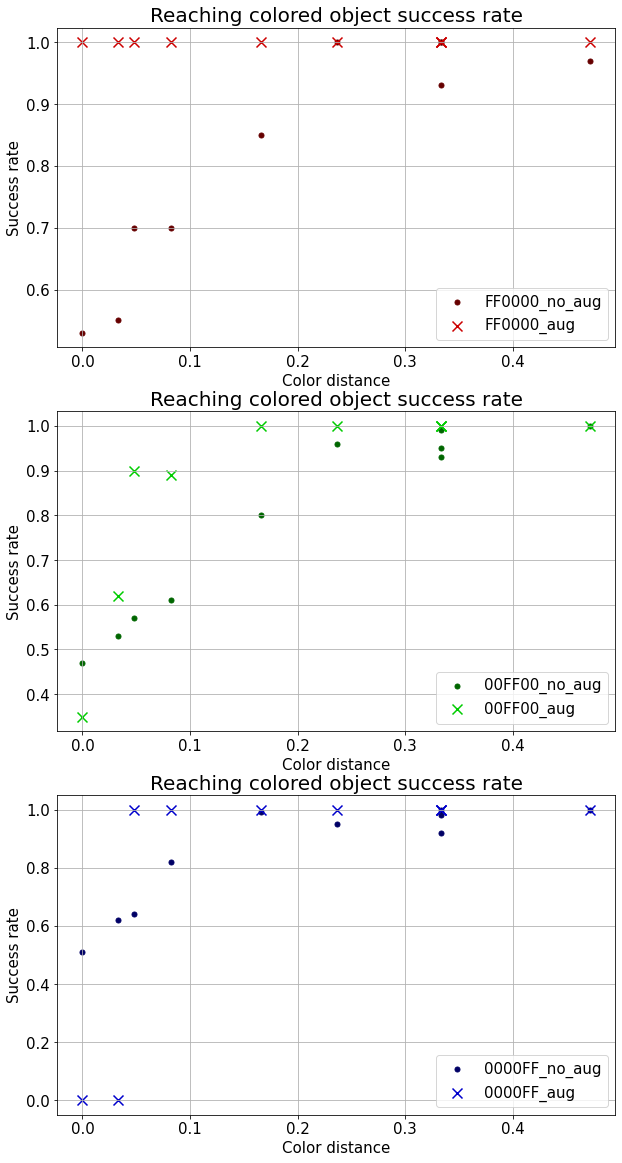

In [4]:
%matplotlib inline
plt.figure(0, figsize=(10, 20))

for i, color in enumerate(["FF0000", "00FF00", "0000FF"]):
    plt.subplot(3, 1, i+1)
    for aug_type in ("no_aug", "aug"):
        with open(f"../data/test_nn32_{color}_{aug_type}_model.json", "r") as f:
            x = json.load(f)
        tgt_color = np.array(x["target_color"])
        dit_colors = np.array(x["distractor_colors"])
        dist_color = np.linalg.norm(dit_colors - tgt_color, axis=1) / (3*255)
        acc = np.array(x['acc_list'])
        if aug_type == "no_aug":
            marker = "."
            c = tgt_color/255 * 0.4
        else:
            marker = "x"
            c = tgt_color/255 *0.8
        plt.scatter(dist_color, acc, marker=marker, s=100, color=c, label=f"{color}_{aug_type}")

    plt.title("Reaching colored object success rate", fontsize=20)
    plt.xlabel("Color distance", fontsize=15)
    plt.ylabel("Success rate", fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(fontsize=15, loc='lower right')
    plt.grid()
    #plt.savefig("../data/reach_color_rgb_sucess_rate_per_color")

In [2]:
import numpy as np

In [3]:
a = np.array([255, 0, 0])
b = np.arange(0, 1.05, 0.05)
a, b

(array([255,   0,   0]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]))

In [77]:
np.array(a.reshape((1, -1)) * b.reshape((-1, 1)), dtype=np.uint8)/255

array([[0.        , 0.        , 0.        ],
       [0.04705882, 0.        , 0.        ],
       [0.09803922, 0.        , 0.        ],
       [0.14901961, 0.        , 0.        ],
       [0.2       , 0.        , 0.        ],
       [0.24705882, 0.        , 0.        ],
       [0.29803922, 0.        , 0.        ],
       [0.34901961, 0.        , 0.        ],
       [0.4       , 0.        , 0.        ],
       [0.44705882, 0.        , 0.        ],
       [0.49803922, 0.        , 0.        ],
       [0.54901961, 0.        , 0.        ],
       [0.6       , 0.        , 0.        ],
       [0.64705882, 0.        , 0.        ],
       [0.69803922, 0.        , 0.        ],
       [0.74901961, 0.        , 0.        ],
       [0.8       , 0.        , 0.        ],
       [0.84705882, 0.        , 0.        ],
       [0.89803922, 0.        , 0.        ],
       [0.94901961, 0.        , 0.        ],
       [1.        , 0.        , 0.        ]])

In [79]:
b * 255

array([  0.  ,  12.75,  25.5 ,  38.25,  51.  ,  63.75,  76.5 ,  89.25,
       102.  , 114.75, 127.5 , 140.25, 153.  , 165.75, 178.5 , 191.25,
       204.  , 216.75, 229.5 , 242.25, 255.  ])

In [101]:
a =np.array([1,0,0])
b =np.array([0,1,1])
range_col = np.round(np.arange(0.1, 1.01, 0.1) * 255)
range_col, a

(array([ 26.,  51.,  77., 102., 128., 153., 179., 204., 230., 255.]),
 array([1, 0, 0]))

In [102]:
aa = range_col.reshape((-1, 1)) * a.reshape((1, -1))

In [103]:
bb = range_col.reshape((-1, 1)) * b.reshape((1, -1)) + a*255

In [106]:
np.array(np.concatenate([aa, bb])[:-1], dtype=np.uint8)

array([[ 26,   0,   0],
       [ 51,   0,   0],
       [ 77,   0,   0],
       [102,   0,   0],
       [128,   0,   0],
       [153,   0,   0],
       [179,   0,   0],
       [204,   0,   0],
       [230,   0,   0],
       [255,   0,   0],
       [255,  26,  26],
       [255,  51,  51],
       [255,  77,  77],
       [255, 102, 102],
       [255, 128, 128],
       [255, 153, 153],
       [255, 179, 179],
       [255, 204, 204],
       [255, 230, 230]], dtype=uint8)

In [14]:
a =np.array([1,0,0])
b =np.array([0,1,1])
range_col = np.round(np.arange(0, 1.01, 0.1) * 255)
aa = range_col.reshape((-1, 1)) * a.reshape((1, -1))
bb = range_col.reshape((-1, 1)) * b.reshape((1, -1)) + a*255
tgt_colors = np.array(np.concatenate([aa, bb])[:-1], dtype=np.uint8)

In [15]:
tgt_colors

array([[  0,   0,   0],
       [ 26,   0,   0],
       [ 51,   0,   0],
       [ 77,   0,   0],
       [102,   0,   0],
       [128,   0,   0],
       [153,   0,   0],
       [179,   0,   0],
       [204,   0,   0],
       [230,   0,   0],
       [255,   0,   0],
       [255,   0,   0],
       [255,  26,  26],
       [255,  51,  51],
       [255,  77,  77],
       [255, 102, 102],
       [255, 128, 128],
       [255, 153, 153],
       [255, 179, 179],
       [255, 204, 204],
       [255, 230, 230]], dtype=uint8)

In [9]:
naug = np.load("../data/test_many_distractors_nn32_0000FF_no_aug_model.npz")
aug = np.load("../data/test_many_distractors_nn32_0000FF_aug_model.npz")

In [10]:
for k in naug.keys():
    print(k)

target_colors
sucess_results
n_steps


In [92]:
naug["sucess_results"].shape, aug["sucess_results"].shape, naug["target_colors"]

((21, 100),
 (21, 100),
 array([[  0,   0,   0],
        [  0,   0,  26],
        [  0,   0,  51],
        [  0,   0,  77],
        [  0,   0, 102],
        [  0,   0, 128],
        [  0,   0, 153],
        [  0,   0, 179],
        [  0,   0, 204],
        [  0,   0, 230],
        [  0,   0, 255],
        [ 26,  26, 255],
        [ 51,  51, 255],
        [ 77,  77, 255],
        [102, 102, 255],
        [128, 128, 255],
        [153, 153, 255],
        [179, 179, 255],
        [204, 204, 255],
        [230, 230, 255],
        [255, 255, 255]], dtype=uint8))

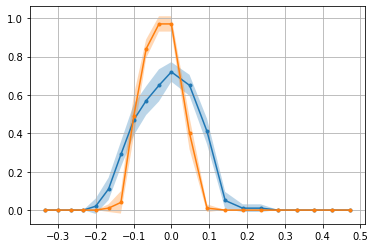

In [110]:
%matplotlib inline

N = len(naug["sucess_results"][0])
k = 5
deg = 2
std_naug = np.array([naug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0)
std_aug = np.array([aug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0)
m_naug = naug["sucess_results"].mean(1)
m_aug = aug["sucess_results"].mean(1)

#x = np.arange(-1, 1.01, 0.1)
x = np.linalg.norm(naug["target_colors"] - np.array([0, 0, 255]), axis=1, ord=deg) / (3*255)
x = np.concatenate([-x[:10], x[10:]])
plt.plot(x, m_naug, '.-')
plt.fill_between(x, m_naug - std_naug, m_naug + std_naug, alpha=0.3)
plt.plot(x, m_aug, '.-')
plt.fill_between(x, m_aug - std_aug, m_aug + std_aug, alpha=0.3)
plt.grid()

In [103]:
x = np.linalg.norm(naug["target_colors"] - np.array([0, 0, 255]), axis=1)
x

array([255.        , 229.        , 204.        , 178.        ,
       153.        , 127.        , 102.        ,  76.        ,
        51.        ,  25.        ,   0.        ,  36.76955262,
        72.12489168, 108.8944443 , 144.24978336, 181.01933598,
       216.37467504, 253.14422766, 288.49956672, 325.26911935,
       360.62445841])

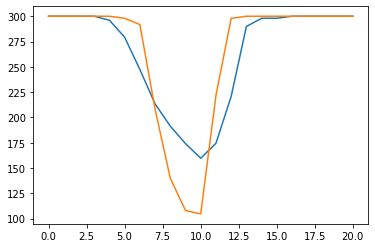

In [39]:
plt.plot(naug['n_steps'].mean(1))
plt.plot(aug['n_steps'].mean(1))

In [78]:
N = 100
k = 5
a = np.array([naug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)])
a.std(0).shape, naug["sucess_results"].std(1).shape

((21,), (21,))

In [85]:
N = 100
k = 1
b = np.array([naug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)])
b.std(0).shape, naug["sucess_results"].std(1).shape

((21,), (21,))

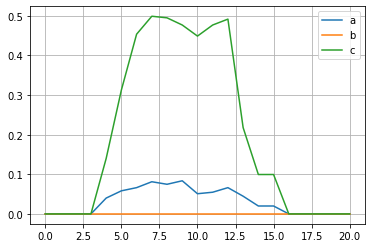

In [86]:
plt.plot(a.std(0), label='a')
plt.plot(b.std(0), label='b')
plt.plot(naug["sucess_results"].std(1), label='c')
plt.legend()
plt.grid()

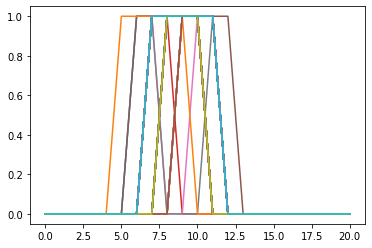

In [30]:
plt.plot(aug["sucess_results"])

In [39]:
aug["sucess_results"][:, :2].sum(1)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
r["target_colors"]

array([[  0,   0,  26],
       [  0,   0,  51],
       [  0,   0,  77],
       [  0,   0, 102],
       [  0,   0, 128],
       [  0,   0, 153],
       [  0,   0, 179],
       [  0,   0, 204],
       [  0,   0, 230],
       [  0,   0, 255],
       [ 26,  26, 255],
       [ 51,  51, 255],
       [ 77,  77, 255],
       [102, 102, 255],
       [128, 128, 255],
       [153, 153, 255],
       [179, 179, 255],
       [204, 204, 255],
       [230, 230, 255]], dtype=uint8)

In [113]:
0.05*255, 0.15*255, 0.25*255

(12.75, 38.25, 63.75)

In [114]:
13, 38, 64

(13, 38, 64)

In [3]:
naug = np.load("../data/test_many_distractors_nn32_0000FF_no_aug_model.npz")
aug = np.load("../data/test_many_distractors_nn32_0000FF_aug_model.npz")
naug_plus = np.load("../data/test_many_distractors_light_target_nn32_0000FF_no_aug_model.npz")

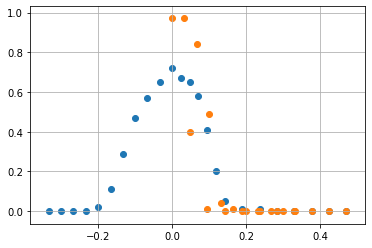

In [9]:
%matplotlib inline

naug_tgt_col = np.concatenate([naug["target_colors"][:10], naug_plus["target_colors"][:1]])
naug_sucess = np.concatenate([naug["sucess_results"], naug_plus["sucess_results"]])
aug_sucess = aug["sucess_results"]
aug_tgt_col = aug["target_colors"]

N = len(naug["sucess_results"][0])
k = 5
deg = 2
std_naug = np.array([naug_sucess[:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0)
std_aug = np.array([aug_sucess[:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0)
m_naug = naug_sucess.mean(1)
m_aug = aug_sucess.mean(1)

#x = np.arange(-1, 1.01, 0.1)
xa = np.linalg.norm(naug_tgt_col - np.array([0, 0, 255]), axis=1, ord=deg) / (3*255)
x = np.concatenate([-xa[:10], xa[10:]])
xb = np.linalg.norm(aug["target_colors"] - np.array([0, 0, 255]), axis=1, ord=deg) / (3*255)
plt.scatter(x, m_naug)
#plt.fill_between(x, m_naug - std_naug, m_naug + std_naug, alpha=0.3)
plt.scatter(xb, m_aug)
#plt.fill_between(xb, m_aug - std_aug, m_aug + std_aug, alpha=0.3)
plt.grid()

In [12]:
a = naug["target_colors"][:]
a

array([[  0,   0,   0],
       [  0,   0,  26],
       [  0,   0,  51],
       [  0,   0,  77],
       [  0,   0, 102],
       [  0,   0, 128],
       [  0,   0, 153],
       [  0,   0, 179],
       [  0,   0, 204],
       [  0,   0, 230],
       [  0,   0, 255],
       [ 26,  26, 255],
       [ 51,  51, 255],
       [ 77,  77, 255],
       [102, 102, 255],
       [128, 128, 255],
       [153, 153, 255],
       [179, 179, 255],
       [204, 204, 255],
       [230, 230, 255],
       [255, 255, 255]], dtype=uint8)

In [11]:
naug_plus["target_colors"]

array([[ 13,  13, 255],
       [ 38,  38, 255],
       [ 64,  64, 255]])

In [4]:
naug = np.load("../data/test_many_distractors_nn32_0000FF_no_aug_model.npz")
aug = np.load("../data/test_many_distractors_nn32_0000FF_aug_model.npz")
naug_plus = np.load("../data/test_many_distractors_light_target_nn32_0000FF_no_aug_model.npz")
aug_plus = np.load("../data/test_many_distractors_light_target_nn32_0000FF_aug_model.npz")

In [34]:
a = naug["target_colors"].copy()
a = np.insert(a, 11, naug_plus["target_colors"][0], axis=0)
a = np.insert(a, 13, naug_plus["target_colors"][1], axis=0)
a = np.insert(a, 15, naug_plus["target_colors"][2], axis=0)
print(a)
target_colors_all = a

sna = naug['sucess_results'].copy()
sna = np.insert(sna, 11, naug_plus["sucess_results"][0], axis=0)
sna = np.insert(sna, 13, naug_plus["sucess_results"][1], axis=0)
sna = np.insert(sna, 15, naug_plus["sucess_results"][2], axis=0)

sa = aug['sucess_results'].copy()
sa = np.insert(sa, 11, aug_plus["sucess_results"][0], axis=0)
sa = np.insert(sa, 13, aug_plus["sucess_results"][1], axis=0)
sa = np.insert(sa, 15, aug_plus["sucess_results"][2], axis=0)

[[  0   0   0]
 [  0   0  26]
 [  0   0  51]
 [  0   0  77]
 [  0   0 102]
 [  0   0 128]
 [  0   0 153]
 [  0   0 179]
 [  0   0 204]
 [  0   0 230]
 [  0   0 255]
 [ 13  13 255]
 [ 26  26 255]
 [ 38  38 255]
 [ 51  51 255]
 [ 64  64 255]
 [ 77  77 255]
 [102 102 255]
 [128 128 255]
 [153 153 255]
 [179 179 255]
 [204 204 255]
 [230 230 255]
 [255 255 255]]


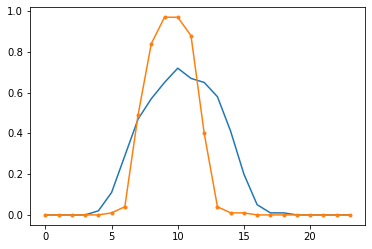

In [35]:
plt.plot(sna.mean(1))
plt.plot(sa.mean(1), '.-')

In [40]:
sna_results = {
    "target_colors": target_colors_all,
    "sucess_results": sna,
}
np.savez_compressed(f"../data/test_many_distractors_shades_of_target_nn32_0000FF_no_aug_model", **sna_results)

In [41]:
sa_results = {
    "target_colors": target_colors_all,
    "sucess_results": sa,
}
np.savez_compressed(f"../data/test_many_distractors_shades_of_target_nn32_0000FF_aug_model", **sa_results)

In [5]:
naug = np.load("../data/test_many_distractors_shades_of_target_nn32_0000FF_no_aug_model.npz")
aug = np.load("../data/test_many_distractors_shades_of_target_nn32_0000FF_aug_model.npz")

/tmp/ipykernel_3570516/3611034578.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


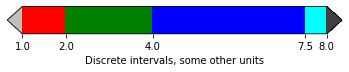

In [89]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.colors.ListedColormap(['red', 'green', 'blue', 'cyan'])
cmap.set_over('0.25')
cmap.set_under('0.75')

bounds = [1, 2, 4, 7.5, 8]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                boundaries=[0] + bounds + [13],
                                extend='both',
                                ticks=bounds,
                                spacing='proportional',
                                orientation='horizontal')
cb2.set_label('Discrete intervals, some other units')
fig.show()

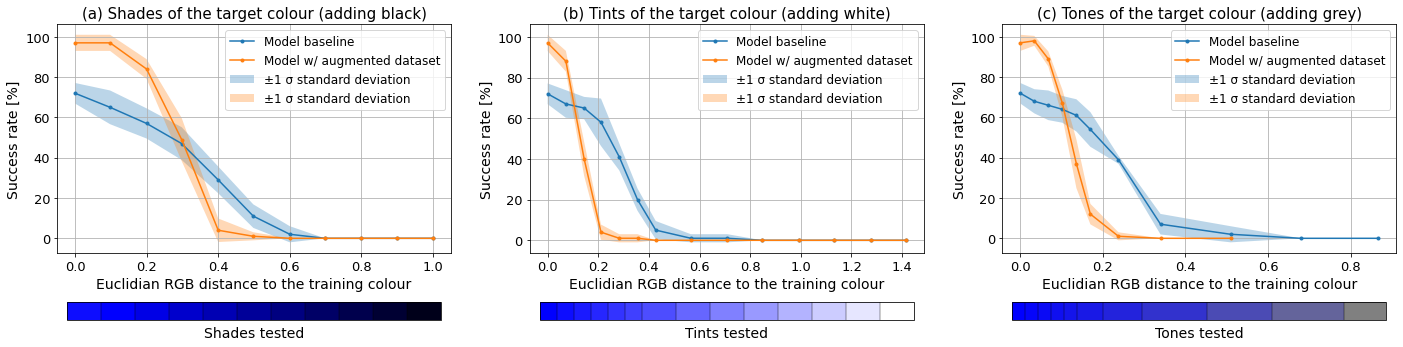

In [2]:
%matplotlib inline

naug = np.load("../data/test_many_distractors_shades_of_target_nn32_0000FF_no_aug_model.npz")
aug = np.load("../data/test_many_distractors_shades_of_target_nn32_0000FF_aug_model.npz")

tones_naug = np.load("../data/test_many_distractors_tones_target_nn32_0000FF_no_aug_model.npz")
tones_aug = np.load("../data/test_many_distractors_tones_target_nn32_0000FF_aug_model.npz")

plt.figure(figsize=(24, 6))
title_fontsize = 15
ax_fontsize = 14
lg_fontsize = 12
tk_fontsize = 13
cb_fontsize = 14
cb_y = -1.2

gs = mpl.gridspec.GridSpec(1, 3, width_ratios=[10, 10, 10]) 


########################################
plt.subplot(gs[0])
########################################


shades = np.arange(11)
N = len(naug["sucess_results"][0])
k = 5
deg = 2
std_naug = np.array([naug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0)[shades] * 100
std_aug = np.array([aug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0)[shades] * 100
m_naug = naug["sucess_results"].mean(1)[shades] * 100
m_aug = aug["sucess_results"].mean(1)[shades] * 100

#x = np.arange(-1, 1.01, 0.1)
x = np.linalg.norm(naug["target_colors"] - np.array([0, 0, 255]), axis=1, ord=deg) / 255
x = x[shades]
plt.plot(x, m_naug, '.-', label="Model baseline")
plt.fill_between(x, m_naug - std_naug, m_naug + std_naug, alpha=0.3, label="±1 σ standard deviation")
plt.plot(x, m_aug, '.-', label="Model w/ augmented dataset")
plt.fill_between(x, m_aug - std_aug, m_aug + std_aug, alpha=0.3, label="±1 σ standard deviation")

plt.title("(a) Shades of the target colour (adding black)", fontsize=title_fontsize)
plt.xlabel("Euclidian RGB distance to the training colour", fontsize=ax_fontsize)
plt.ylabel("Success rate [%]", fontsize=ax_fontsize)

plt.xticks(fontsize=tk_fontsize)
plt.yticks(fontsize=tk_fontsize)
plt.legend(fontsize=lg_fontsize)
plt.grid()

bound = list(range(12))
cmap_list = naug["target_colors"][11 - shades] / 255
cmap = mpl.colors.ListedColormap(cmap_list)
norm = mpl.colors.BoundaryNorm(bound, cmap.N)
scalarmap = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
clb = plt.colorbar(scalarmap,  orientation='horizontal',
    spacing='proportional', shrink=0.95, drawedges=True, ticks=[])

clb.ax.set_title('Shades tested',fontsize=cb_fontsize, y=cb_y)


########################################
plt.subplot(gs[1])
########################################

shades = np.arange(10, 24)
N = len(naug["sucess_results"][0])
k = 5
deg = 2
std_naug = np.array([naug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0)[shades] * 100
std_aug = np.array([aug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0)[shades] * 100
m_naug = naug["sucess_results"].mean(1)[shades] * 100
m_aug = aug["sucess_results"].mean(1)[shades] * 100

#x = np.arange(-1, 1.01, 0.1)
x = np.linalg.norm(naug["target_colors"] - np.array([0, 0, 255]), axis=1, ord=deg) / 255
x = x[shades]

plt.plot(x, m_naug, '.-', label="Model baseline")
plt.fill_between(x, m_naug - std_naug, m_naug + std_naug, alpha=0.3, label="±1 σ standard deviation")
plt.plot(x, m_aug, '.-', label="Model w/ augmented dataset")
plt.fill_between(x, m_aug - std_aug, m_aug + std_aug, alpha=0.3, label="±1 σ standard deviation")

plt.title("(b) Tints of the target colour (adding white)", fontsize=title_fontsize)
plt.xlabel("Euclidian RGB distance to the training colour", fontsize=ax_fontsize)
plt.ylabel("Success rate [%]", fontsize=ax_fontsize)

plt.xticks(fontsize=tk_fontsize)
plt.yticks(fontsize=tk_fontsize)
plt.legend(fontsize=lg_fontsize)
plt.grid()

bound = list(range(0, 30, 5)) + list(range(30, 120, 10))
cmap_list = naug["target_colors"][shades] / 255
cmap = mpl.colors.ListedColormap(cmap_list)
norm = mpl.colors.BoundaryNorm(bound, cmap.N)
scalarmap = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
clb = plt.colorbar(scalarmap,  orientation='horizontal', 
    spacing='proportional', shrink=0.95, drawedges=True, ticks=[])

clb.ax.set_title('Tints tested',fontsize=cb_fontsize, y=cb_y)


########################################
plt.subplot(gs[2])
########################################



N = len(tones_naug["sucess_results"][0])
k = 5
deg = 2
std_naug = np.array([tones_naug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0) * 100
std_aug = np.array([tones_aug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0) * 100
m_naug = tones_naug["sucess_results"].mean(1) * 100
m_aug = tones_aug["sucess_results"].mean(1) * 100


#x = np.arange(-1, 1.01, 0.1)
x_naug = np.linalg.norm(tones_naug["target_colors"] - np.array([0, 0, 255]), axis=1, ord=deg) / 255
x_aug = np.linalg.norm(tones_aug["target_colors"] - np.array([0, 0, 255]), axis=1, ord=deg) / 255

plt.plot(x_naug, m_naug, '.-', label="Model baseline")
plt.fill_between(x_naug, m_naug - std_naug, m_naug + std_naug, alpha=0.3, label="±1 σ standard deviation")
plt.plot(x_aug, m_aug, '.-', label="Model w/ augmented dataset")
plt.fill_between(x_aug, m_aug - std_aug, m_aug + std_aug, alpha=0.3, label="±1 σ standard deviation")

plt.title("(c) Tones of the target colour (adding grey)", fontsize=title_fontsize)
plt.xlabel("Euclidian RGB distance to the training colour", fontsize=ax_fontsize)
plt.ylabel("Success rate [%]", fontsize=ax_fontsize)

plt.xticks(fontsize=tk_fontsize)
plt.yticks(fontsize=tk_fontsize)
plt.legend(fontsize=lg_fontsize)
plt.grid()

bound = list(x_naug) + [x_naug[-1] + 28/255]
cmap_list = tones_naug["target_colors"] / 255
cmap = mpl.colors.ListedColormap(cmap_list)
norm = mpl.colors.BoundaryNorm(bound, cmap.N)
scalarmap = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
clb = plt.colorbar(scalarmap,  orientation='horizontal', 
    spacing='proportional', shrink=0.95, drawedges=True, ticks=[])

clb.ax.set_title('Tones tested',fontsize=cb_fontsize, y=cb_y)




plt.show()









In [19]:
########################################
#ax = plt.subplot(gs[3])
########################################

distractor_colors = np.array([
    [255, 0, 0],
    [0, 255, 0],
    [255, 255, 0],
    [0, 255, 255],
    [255, 0, 255],
    [255, 255, 255],
    [0, 0, 0],
])

cmap = mpl.colors.ListedColormap(distractor_colors / 255)
cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                orientation='vertical', 
                                ticks=[],
                                )
cb2.set_label("Distarctor colours", fontsize=12)

In [24]:
tones_naug = np.load("../data/test_many_distractors_tones_target_nn32_FF0000_no_aug_model.npz")
tones_aug = np.load("../data/test_many_distractors_tones_target_nn32_FF0000_aug_model.npz")

tones_naug['target_colors'], tones_aug['target_colors']

(array([[255,   0,   0],
        [230,   0,   0],
        [204,   0,   0],
        [179,   0,   0],
        [153,   0,   0],
        [128,   0,   0],
        [102,   0,   0],
        [ 76,   0,   0]], dtype=uint8),
 array([[255,   0,   0],
        [230,   0,   0],
        [204,   0,   0],
        [179,   0,   0],
        [153,   0,   0],
        [128,   0,   0],
        [102,   0,   0],
        [ 76,   0,   0]], dtype=uint8))

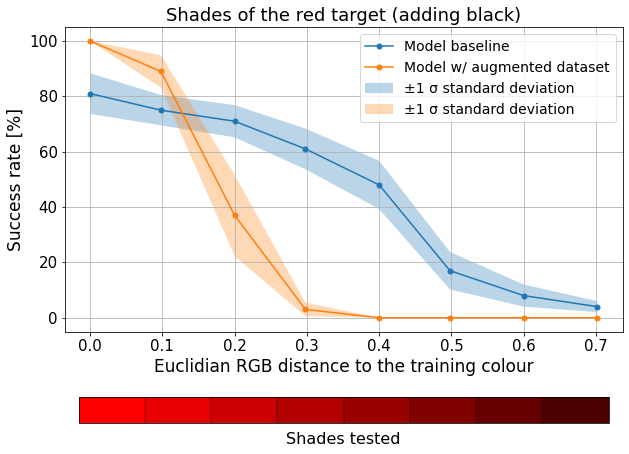

In [5]:
%matplotlib inline

shades_naug = np.load("../data/test_many_distractors_tones_target_nn32_FF0000_no_aug_model.npz")
shades_aug = np.load("../data/test_many_distractors_tones_target_nn32_FF0000_aug_model.npz")

plt.figure(figsize=(10, 8))
title_fontsize = 18
ax_fontsize = 17
lg_fontsize = 14
tk_fontsize = 15
cb_fontsize = 16
cb_y = -1.0
mks = 10


init_color = [255, 0, 0]
N = len(shades_naug["sucess_results"][0])
k = 5
deg = 2
std_naug = np.array([shades_naug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0) * 100
std_aug = np.array([shades_aug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0) * 100
m_naug = shades_naug["sucess_results"].mean(1) * 100
m_aug = shades_aug["sucess_results"].mean(1) * 100


#x = np.arange(-1, 1.01, 0.1)
x_naug = np.linalg.norm(shades_naug["target_colors"] - np.array(init_color), axis=1, ord=deg) / np.sqrt(255**2)
x_aug = np.linalg.norm(shades_aug["target_colors"] - np.array(init_color), axis=1, ord=deg) / np.sqrt(255**2)

plt.plot(x_naug, m_naug, '.-', markersize=mks, label="Model baseline")
plt.fill_between(x_naug, m_naug - std_naug, m_naug + std_naug, alpha=0.3, label="±1 σ standard deviation")
plt.plot(x_aug, m_aug, '.-', markersize=mks, label="Model w/ augmented dataset")
plt.fill_between(x_aug, m_aug - std_aug, m_aug + std_aug, alpha=0.3, label="±1 σ standard deviation")

plt.title("Shades of the red target (adding black)", fontsize=title_fontsize)
plt.xlabel("Euclidian RGB distance to the training colour", fontsize=ax_fontsize)
plt.ylabel("Success rate [%]", fontsize=ax_fontsize)

plt.xticks(fontsize=tk_fontsize)
plt.yticks(fontsize=tk_fontsize)
plt.legend(fontsize=lg_fontsize)
plt.grid()

bound = list(range(9))
cmap_list = shades_naug["target_colors"] / 255
cmap = mpl.colors.ListedColormap(cmap_list)
norm = mpl.colors.BoundaryNorm(bound, cmap.N)
scalarmap = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
clb = plt.colorbar(scalarmap,  orientation='horizontal',
    spacing='proportional', shrink=0.95, drawedges=True, ticks=[])

clb.ax.set_title('Shades tested',fontsize=cb_fontsize, y=cb_y)

plt.show()

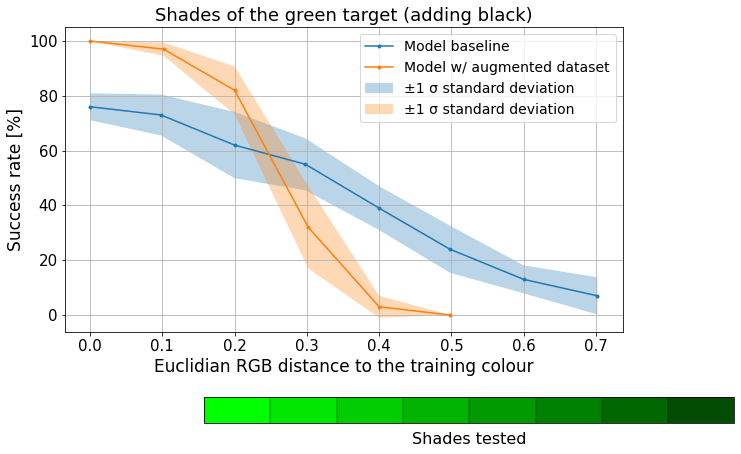

In [2]:
%matplotlib inline

shades_naug = np.load("../data/test_many_distractors_shades_target_nn32_00FF00_no_aug_model.npz")
shades_aug = np.load("../data/test_many_distractors_tones_target_nn32_00FF00_aug_model.npz")

fig = plt.figure(figsize=(10, 8))
title_fontsize = 18
ax_fontsize = 17
lg_fontsize = 14
tk_fontsize = 15
cb_fontsize = 16
cb_y = -1.0


init_color = [0, 255, 0]
N = len(shades_naug["sucess_results"][0])
k = 5
deg = 2
std_naug = np.array([shades_naug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0) * 100
std_aug = np.array([shades_aug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0) * 100
m_naug = shades_naug["sucess_results"].mean(1) * 100
m_aug = shades_aug["sucess_results"].mean(1) * 100


#x = np.arange(-1, 1.01, 0.1)
x_naug = np.linalg.norm(shades_naug["target_colors"] - np.array(init_color), axis=1, ord=deg) / np.sqrt(255**2)
x_aug = np.linalg.norm(shades_aug["target_colors"] - np.array(init_color), axis=1, ord=deg) / np.sqrt(255**2)

plt.plot(x_naug, m_naug, '.-', label="Model baseline")
plt.fill_between(x_naug, m_naug - std_naug, m_naug + std_naug, alpha=0.3, label="±1 σ standard deviation")
plt.plot(x_aug, m_aug, '.-', label="Model w/ augmented dataset")
plt.fill_between(x_aug, m_aug - std_aug, m_aug + std_aug, alpha=0.3, label="±1 σ standard deviation")

plt.title("Shades of the green target (adding black)", fontsize=title_fontsize)
plt.xlabel("Euclidian RGB distance to the training colour", fontsize=ax_fontsize)
plt.ylabel("Success rate [%]", fontsize=ax_fontsize)

plt.xticks(fontsize=tk_fontsize)
plt.yticks(fontsize=tk_fontsize)
plt.legend(fontsize=lg_fontsize)
plt.grid()

bound = list(range(9))
cmap_list = shades_naug["target_colors"] / 255
cmap = mpl.colors.ListedColormap(cmap_list)
norm = mpl.colors.BoundaryNorm(bound, cmap.N)
scalarmap = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
clb = plt.colorbar(scalarmap,  orientation='horizontal',
    spacing='proportional', shrink=0.95, drawedges=True, ticks=[], anchor=[5, 10])

clb.ax.set_title('Shades tested',fontsize=cb_fontsize, y=cb_y)


plt.show()

In [170]:
object_names = [
    'blue_cuboid', 
    'red_cuboid', 
    'green_cuboid', 
    'white_cuboid', 
    'black_cuboid',
    'yellow_cuboid',
    'purple_cuboid',
    'turquoise_cuboid',
    ]

distractor_colors = np.array([
    [255, 0, 0],
    [0, 255, 0],
    [255, 255, 0],
    [0, 255, 255],
    [255, 0, 255],
    [255, 255, 255],
    [0, 0, 0],
])

In [299]:
r_indicator = np.array([1,0,0])
range_intensity = np.round(np.arange(0.2, 1.01, 0.1) * 255)
colors_red_shade = range_intensity.reshape((-1, 1)) * r_indicator.reshape((1, -1))
target_colors = np.array(colors_red_shade, dtype=np.uint8)

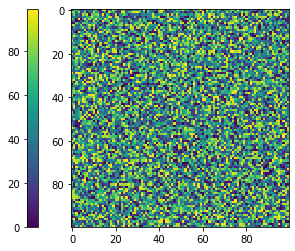

In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)
axp = ax.imshow(np.random.randint(0, 100, (100, 100)))
cb = plt.colorbar(axp,ax=[ax],location='left')
plt.show()

In [41]:
x = np.load('../data/test_scales_target_nn32_0000FF_aug_model.npz')
for k in x.keys():
    print(k)

distractor_scales
sucess_results
n_steps


In [43]:
x['sucess_results'].mean(1)

array([0.99, 0.93, 0.81, 0.75, 0.62, 0.49, 0.33, 0.3 , 0.23, 0.21, 0.2 ,
       0.14])

In [44]:
0.06*0.12

0.0072

In [46]:
np.sqrt(0.06*0.12/np.pi)

0.04787307364817192

In [48]:
0.047873**2*np.pi

0.007199977846986227

In [49]:
0.047873*2

0.095746

In [23]:
scales_cyl_aug = np.load('../data/test_scales_cylinder_distractor_nn32_0000FF_aug_model.npz')
for k in x.keys():
    print(k)

distractor_scales
sucess_results
n_steps


In [24]:
scales_cyl_naug = np.load('../data/test_scales_cylinder_distractor_nn32_0000FF_no_aug_model.npz')
for k in x.keys():
    print(k)

distractor_scales
sucess_results
n_steps


In [28]:
scales_cyl_aug["distractor_scales"], scales_cyl_naug["distractor_scales"]

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2]))

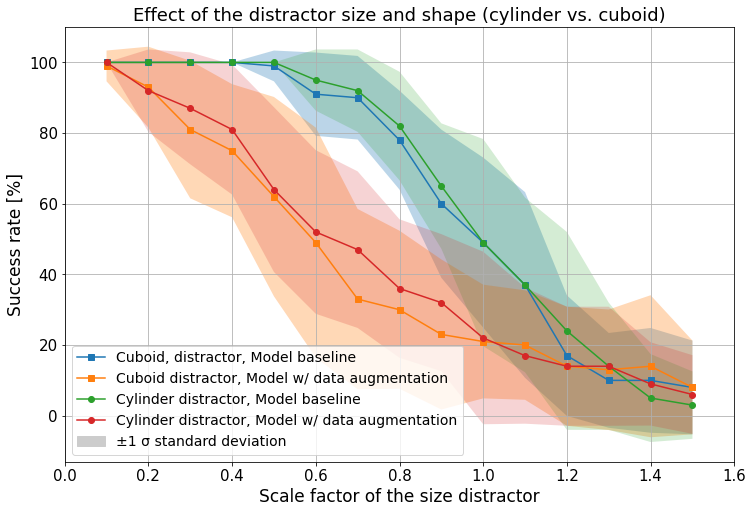

In [ ]:
%matplotlib inline


fig = plt.figure(figsize=(12, 8))
title_fontsize = 18
ax_fontsize = 17
lg_fontsize = 14
tk_fontsize = 15
cb_fontsize = 16
cb_y = -1.0


scales_cub_naug = np.load('../data/test_scales_new_cuboid_distractor_nn32_0000FF_no_aug_model.npz')
scales_cub_aug = np.load('../data/test_scales_new_cuboid_distractor_nn32_0000FF_aug_model.npz')

scales_cyl_naug = np.load('../data/test_scales_new_cylinder_distractor_nn32_0000FF_no_aug_model.npz')
scales_cyl_aug = np.load('../data/test_scales_new_cylinder_distractor_nn32_0000FF_aug_model.npz')

N = 100
k = 20

factor_percent = 100

x_cub_naug = scales_cub_naug["distractor_scales"]
x_cub_aug = scales_cub_aug["distractor_scales"]
x_cyl_naug = scales_cyl_naug["distractor_scales"]
x_cyl_aug = scales_cyl_aug["distractor_scales"]

m_cub_naug = scales_cub_naug["sucess_results"].mean(1) * factor_percent
m_cub_aug = scales_cub_aug["sucess_results"].mean(1) * factor_percent
m_cyl_naug = scales_cyl_naug["sucess_results"].mean(1) * factor_percent
m_cyl_aug = scales_cyl_aug["sucess_results"].mean(1) * factor_percent

std_cub_naug = np.array([scales_cub_naug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0) * factor_percent
std_cub_aug = np.array([scales_cub_aug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0) * factor_percent
std_cyl_naug = np.array([scales_cyl_naug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0) * factor_percent
std_cyl_aug = np.array([scales_cyl_aug["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0) * factor_percent

plt.plot(x_cub_naug, m_cub_naug, 's-', label="Cuboid, distractor, Model baseline")
plt.fill_between(x_cub_naug, m_cub_naug-std_cub_naug, m_cub_naug+std_cub_naug, alpha=0.3)
plt.plot(x_cub_aug, m_cub_aug, 's-', label="Cuboid distractor, Model w/ data augmentation")
plt.fill_between(x_cub_aug, m_cub_aug-std_cub_aug, m_cub_aug+std_cub_aug, alpha=0.3)
plt.plot(x_cyl_naug, m_cyl_naug, 'o-', label="Cylinder distractor, Model baseline")
plt.fill_between(x_cyl_naug, m_cyl_naug-std_cyl_naug, m_cyl_naug+std_cyl_naug, alpha=0.2)
plt.plot(x_cyl_aug, m_cyl_aug, 'o-', label="Cylinder distractor, Model w/ data augmentation")
plt.fill_between(x_cyl_aug, m_cyl_aug-std_cyl_aug, m_cyl_aug+std_cyl_aug, alpha=0.2)
plt.fill_between([-100, -120], [0, 0], [1, 1], color=3*[.8], label="±1 σ standard deviation")

plt.title("Effect of the distractor size and shape (cylinder vs. cuboid)", fontsize=title_fontsize)
plt.xlabel("Scale factor of the size distractor", fontsize=ax_fontsize)
plt.ylabel("Success rate [%]", fontsize=ax_fontsize)

plt.xlim(0, 1.6)

plt.xticks(fontsize=tk_fontsize)
plt.yticks(fontsize=tk_fontsize)
plt.legend(fontsize=lg_fontsize)
plt.grid()

In [69]:
scales_cyl_naug = np.load('../data/test_scales_cylinder_distractor_nn32_0000FF_no_aug_model.npz')
scales_cyl_naug15 = np.load('../data/test_scales_1p5_cylinder_distractor_nn32_0000FF_no_aug_model.npz')

In [71]:
scales_cyl_naug['distractor_scales'], scales_cyl_naug15['distractor_scales']

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2]),
 array([1.3, 1.4, 1.5]))

In [74]:
scales_cyl_naug['sucess_results'].shape, scales_cyl_naug15['sucess_results'].shape, np.concatenate([scales_cyl_naug['sucess_results'], scales_cyl_naug15['sucess_results']]).shape

((12, 100), (3, 100), (15, 100))

In [75]:
cat_res = {
    'distractor_scales': np.concatenate([scales_cyl_naug['distractor_scales'], scales_cyl_naug15['distractor_scales']]),
    'sucess_results': np.concatenate([scales_cyl_naug['sucess_results'], scales_cyl_naug15['sucess_results']]),
    'n_steps': np.concatenate([scales_cyl_naug['n_steps'], scales_cyl_naug15['n_steps']]),
}

In [77]:
np.savez_compressed('../data/test_scales_new_cylinder_distractor_nn32_0000FF_no_aug_model.npz', **cat_res)

In [81]:
scales_cyl_aug = np.load('../data/test_scales_cylinder_distractor_nn32_0000FF_aug_model.npz')
scales_cyl_aug13 = np.load('../data/test_scales_1p3_cylinder_distractor_nn32_0000FF_aug_model.npz')
scales_cyl_aug15 = np.load('../data/test_scales_1p5_cylinder_distractor_nn32_0000FF_aug_model.npz')

In [82]:
cat_res = {
    'distractor_scales': np.concatenate([scales_cyl_aug['distractor_scales'], scales_cyl_aug13['distractor_scales'], scales_cyl_aug15['distractor_scales']]),
    'sucess_results': np.concatenate([scales_cyl_aug['sucess_results'], scales_cyl_aug13['sucess_results'], scales_cyl_aug15['sucess_results']]),
    'n_steps': np.concatenate([scales_cyl_aug['n_steps'], scales_cyl_aug15['n_steps'], scales_cyl_aug15['n_steps']]),
}

In [83]:
np.savez_compressed('../data/test_scales_new_cylinder_distractor_nn32_0000FF_aug_model.npz', **cat_res)

In [106]:
scales_cub_naug = np.load('../data/test_scales_1p5_cuboid_distractor_nn32_0000FF_no_aug_model.npz')

In [108]:
scales_cub_naug['sucess_results'].shape

(3, 100)

In [113]:
scales_cub_naug = np.load('../data/test_scales_target_nn32_0000FF_no_aug_model.npz')
scales_cub_naug15 = np.load('../data/test_scales_1p5_cuboid_distractor_nn32_0000FF_no_aug_model.npz')

cat_res = {
    'distractor_scales': np.concatenate([scales_cub_naug['distractor_scales'], scales_cub_naug15['distractor_scales']]),
    'sucess_results': np.concatenate([scales_cub_naug['sucess_results'], scales_cub_naug15['sucess_results']]),
    'n_steps': np.concatenate([scales_cub_naug['n_steps'], scales_cub_naug15['n_steps']]),
}

for k, v in cat_res.items():
    print(k, v.shape)
print(cat_res['distractor_scales'])

distractor_scales (15,)
sucess_results (15, 100)
n_steps (15, 100)
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5]


In [114]:
np.savez_compressed('../data/test_scales_new_cuboid_distractor_nn32_0000FF_no_aug_model.npz', **cat_res)

In [124]:
scales_cub_aug = np.load('../data/test_scales_target_nn32_0000FF_aug_model.npz')
scales_cub_aug15 = np.load('../data/test_scales_1p5_cuboid_distractor_nn32_0000FF_aug_model.npz')

cat_res = {
    'distractor_scales': np.concatenate([scales_cub_aug['distractor_scales'], scales_cub_aug15['distractor_scales']]),
    'sucess_results': np.concatenate([scales_cub_aug['sucess_results'], scales_cub_aug15['sucess_results']]),
    'n_steps': np.concatenate([scales_cub_aug['n_steps'], scales_cub_aug15['n_steps']]),
}

for k, v in cat_res.items():
    print(k, v.shape)
print(cat_res['distractor_scales'])

distractor_scales (15,)
sucess_results (15, 100)
n_steps (15, 100)
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5]


In [125]:
np.savez_compressed('../data/test_scales_new_cuboid_distractor_nn32_0000FF_aug_model.npz', **cat_res)

In [121]:
x50 = np.load('../data/test_no_distractor_nn32_ori_no_aug_model_00FF00_ntraj_50.npz')
x100 = np.load('../data/test_no_distractor_nn32_ori_no_aug_model_00FF00_ntraj_100.npz')

In [123]:
x50["sucess_results"].mean(), x100["sucess_results"].mean()

(0.98, 0.88)

In [6]:
for col in ['0000FF', '00FF00', 'FF0000']:
    x = np.load(f'../data/test_distractors_different_colors_nn32_{col}_aug_model.npz')
    print(col)
    print(x["n_steps"])
    x = np.load(f'../data/test_distractors_different_colors_nn32_{col}_no_aug_model.npz')
    print(x["n_steps"].mean())

0000FF
[[ 98 101 108  96  90  91  92  99  92 101  94  93  94 104  93  99 105  99
   94  96  91  97 105  95 101  92  96  91 159  89  94  92  93  92  89 112
   89 105  97  99  89  98  92  88  90  95  96  91  97  94  93  99  98 100
  101  95  89 102  90  99 101  97  98  92  94 108  96  89 102  92  98  92
  103 101  93  98 102  95 100  90  93  93  93  92 109  95  96  96 100  99
  100  99  90 108  93 101  92  96 102  95]]
96.15
00FF00
[[ 98  97 113  97  89  90  92 102  92  99  95  89  94 101  93 101 102  98
   94  95  92  96 103  90  99  92  95  93  99  90  95  92  94  90  87 113
   88 104  97  96  89  97  91  90  89  94  95  88  96  94  96 102  96 100
   98  94  88  98  87  99  98  95 100  91  94 108  94  90 102  91  94  89
   99 100  92  94 102  95 102  88  91  91  93  89 101  93  95  95 100  96
   99  98  90 107  96  99  90  92  99  94]]
94.92
FF0000
[[ 96  99 106  95  89  89  91  98  92  99  94  89  93 104  91  98 101  97
   97  93  88  97 105  91 102  90  93  91  97  88  94  91  94  90

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

In [6]:
x = np.load(f'../data/test_distractors_similar_colors_nn32_0000FF_no_aug_model.npz')
y = np.load(f'../data/test_distractors_similar_colors_nn32_0000FF_aug_model.npz')
print(x["sucess_results"].mean() * 100)
print(y["sucess_results"].mean() * 100)

59.0
99.0


In [8]:
x = np.load(f'../data/test_models_with_similar_color_to_red.npz')
print(x["sucess_results"].mean(1) * 100)
print(x["sucess_results"].shape)

[ 74. 100.]
(2, 100)


In [3]:
x = np.load(f'../data/test_models_with_similar_color_to_green.npz')
print(x["sucess_results"].mean(1) * 100)
print(x["sucess_results"].shape)

[ 73. 100.]
(2, 100)


In [ ]:
results_table = {
    'success': {
        'different_0000FF_aug':,
        'different_0000FF_naug':,
        'similar_0000FF_aug':,
        'similar_0000FF_naug':,
        'different_00FF00_aug':,
        'different_00FF00_naug':,
        'similar_00FF00_aug':,
        'similar_00FF00_naug':,
        'different_FF0000_aug': ,
        'different_FF0000_naug':,
        'similar_FF0000_aug':,
        'similar_FF0000_naug':,
    }
}

In [26]:
results_table = {
    'success': [
        np.load(f'../data/test_distractors_different_colors_nn32_0000FF_no_aug_model.npz')["sucess_results"],
        np.load(f'../data/test_distractors_different_colors_nn32_0000FF_aug_model.npz')["sucess_results"],

        np.load(f'../data/test_distractors_similar_colors_nn32_0000FF_no_aug_model.npz')["sucess_results"],
        np.load(f'../data/test_distractors_similar_colors_nn32_0000FF_aug_model.npz')["sucess_results"],

        np.load(f'../data/test_distractors_different_colors_nn32_00FF00_no_aug_model.npz')["sucess_results"],
        np.load(f'../data/test_distractors_different_colors_nn32_00FF00_aug_model.npz')["sucess_results"],

        np.load(f'../data/test_models_with_similar_color_to_green.npz')["sucess_results"][0],
        np.load(f'../data/test_models_with_similar_color_to_green.npz')["sucess_results"][1],

        np.load(f'../data/test_distractors_different_colors_nn32_FF0000_no_aug_model.npz')["sucess_results"],
        np.load(f'../data/test_distractors_different_colors_nn32_FF0000_aug_model.npz')["sucess_results"],

        np.load(f'../data/test_models_with_similar_color_to_red.npz')["sucess_results"][0],
        np.load(f'../data/test_models_with_similar_color_to_red.npz')["sucess_results"][1],
    ],

    'id': [
        'different_0000FF_naug',
        'different_0000FF_aug',
        'similar_0000FF_naug',
        'similar_0000FF_aug',
        'different_00FF00_naug',
        'different_00FF00_aug',
        'similar_00FF00_naug',
        'similar_00FF00_aug',
        'different_FF0000_naug',
        'different_FF0000_aug',
        'similar_FF0000_naug',
        'similar_FF0000_aug',
    ]
}

In [27]:
results_df = {}
results_df["success"] = np.stack([a.flatten() for a in results_table["success"]])

In [28]:
results_df["success"].shape

(12, 100)

In [29]:
x = results_df["success"]

In [31]:
x.mean(1)

array([1.  , 1.  , 0.59, 0.99, 1.  , 1.  , 0.73, 1.  , 0.98, 1.  , 0.74,
       1.  ])

In [34]:
N = 100
k = 5

std = np.array([x[:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0) * 100
std

array([0.        , 0.        , 8.60232527, 2.        , 0.        ,
       0.        , 2.44948974, 0.        , 2.44948974, 0.        ,
       5.83095189, 0.        ])

In [35]:
r = np.array([x.mean(1), std])

In [52]:
np.savez_compressed("../data/test_similar_different_mean_std", success_mean_std=r.T)

In [38]:
results_df["is_augmented"] = np.array(6*[0,1], dtype=bool)

In [43]:
results_df["target_color"] = np.array(3*[[0, 0, 255]] + 3*[[0, 255, 0]] + 3*[[255, 0, 0]], dtype=np.uint8)

In [46]:
results_df["is_similar"] = np.array(3*[0, 0, 1, 1])

In [47]:
results_df

{'success': array([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [False,  True,  True, ...,  True, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True, False, False, ...,  True,  True, False],
        [ True,  True,  True, ...,  True,  True,  True]]),
 'is_augmented': array([False,  True, False,  True, False,  True, False,  True, False,
         True, False,  True]),
 'target_color': array([[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]], dtype=uint8),
 'is_similar': array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1])}

In [55]:
x = np.load("../data/test_multi_models_with_many_distractors_nn32_ori_no_aug_model_FF0000_ntraj_250.npz")
for k in x.keys():
    print(k)

model_names
sucess_results
n_steps


In [59]:
x['model_names']

array(['nn32_ori_no_aug_model_FF0000_ntraj_50',
       'nn32_ori_no_aug_model_FF0000_ntraj_100',
       'nn32_ori_no_aug_model_FF0000_ntraj_150',
       'nn32_ori_no_aug_model_FF0000_ntraj_200',
       'nn32_ori_aug_model_FF0000_ntraj_200',
       'nn32_ori_no_aug_model_FF0000_ntraj_250'], dtype='<U38')

In [63]:
x['sucess_results'].mean(1)

array([0.08, 0.16, 0.11, 0.31, 0.25, 0.08])

In [72]:
x['sucess_results'].mean(1)

array([0.92, 0.62, 0.91, 0.88, 0.84, 0.  ])

In [12]:
ori = np.load("../data/test_ori_blue_models_no_aug_no_distractor.npz")
nori = np.load("../data/test_blue_models_10_250_no_distractor.npz")
for k in ori.keys():
    print(k)

model_names
sucess_results
n_steps


In [15]:
ori["model_names"], nori["model_names"], ori["sucess_results"].mean(1), nori["sucess_results"].mean(1)

(array(['nn32_ori_no_aug_model_0000FF_ntraj_250',
        'nn32_ori_no_aug_model_0000FF_ntraj_200',
        'nn32_ori_no_aug_model_0000FF_ntraj_150',
        'nn32_ori_no_aug_model_0000FF_ntraj_100',
        'nn32_ori_no_aug_model_0000FF_ntraj_50',
        'nn32_ori_no_aug_model_0000FF_ntraj_10'], dtype='<U38'),
 array(['nn32_no_aug_model_0000FF_ntraj_3',
        'nn32_no_aug_model_0000FF_ntraj_4',
        'nn32_no_aug_model_0000FF_ntraj_5',
        'nn32_no_aug_model_0000FF_ntraj_10',
        'nn32_no_aug_model_0000FF_ntraj_20',
        'nn32_no_aug_model_0000FF_ntraj_30'], dtype='<U33'),
 array([0.92, 0.62, 0.91, 0.88, 0.84, 0.  ]),
 array([0.  , 0.01, 0.6 , 1.  , 1.  , 1.  ]))

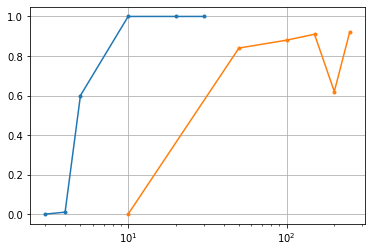

In [21]:
%matplotlib inline

ori = np.load("../data/test_ori_blue_models_no_aug_no_distractor.npz")
nori = np.load("../data/test_blue_models_10_250_no_distractor.npz")

succ_nori = nori["sucess_results"].mean(1)
x_nori = np.array([3, 4, 5, 10, 20, 30])

succ_ori = ori["sucess_results"].mean(1)
x_ori = np.array([250, 200, 150, 100, 50, 10])

plt.plot(x_nori, succ_nori, '.-')
plt.plot(x_ori, succ_ori, '.-')

plt.xscale('log')

plt.grid()

In [74]:
ron = np.load("../data/test_no_distractor_nn32_ori_no_aug_model_FF0000_ntraj_200.npz")
gon = np.load("../data/test_no_distractor_nn32_ori_no_aug_model_00FF00_ntraj_200.npz")
#bon = np.load("../data/test_no_distractor_nn32_ori_no_aug_model_0000FF_ntraj_200.npz")

N = 100
k = 5
factor_percent = 100

models = [ron, gon]
for model in models:
    mean = model["sucess_results"].mean(1) * factor_percent
    print(mean)
    std = np.array([model["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]) * factor_percent
    print(std)
    std= std.std(0)
    print(std)

[88.]
[[ 90.]
 [ 75.]
 [100.]
 [ 80.]
 [ 95.]]
[9.2736185]
[92.]
[[95.]
 [95.]
 [95.]
 [85.]
 [90.]]
[4.]


In [91]:
bon = np.load("../data/test_blue_models_10_250_no_distractor.npz")
for key in bon.keys():
    print(key)

model_names
sucess_results
n_steps


In [92]:
bon['model_names']

array(['nn32_no_aug_model_0000FF_ntraj_3',
       'nn32_no_aug_model_0000FF_ntraj_4',
       'nn32_no_aug_model_0000FF_ntraj_5',
       'nn32_no_aug_model_0000FF_ntraj_10',
       'nn32_no_aug_model_0000FF_ntraj_20',
       'nn32_no_aug_model_0000FF_ntraj_30'], dtype='<U33')

In [93]:
bon['n_steps'].mean(1), np.array([a for a in bon['n_steps'][-1] if a == 1]).std()

(array([300.  , 298.5 , 181.53,  96.56,  95.43,  95.39]), nan)

In [94]:
[a for a in bon['n_steps'][-1] if a == 1]

[]

In [95]:
bon['n_steps']

array([[300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,
        300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,
        300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,
        300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,
        300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,
        300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,
        300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,
        300, 300, 300, 300, 300, 300, 300, 300, 300],
       [300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,
        300, 300, 300, 300, 300, 300, 300, 300, 150, 300, 300, 300, 300,
        300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,
        300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,
        300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,
        300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 30

In [48]:
N = 100
k = 5
factor_percent = 100
np.array([bon["n_steps"][-1][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0) * factor_percent

array([   0.        ,  300.        , 1792.84578255,  128.77888026,
         69.89992847,   56.16048433])

In [32]:
bon["n_steps"]

array([[300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,
        300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,
        300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,
        300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,
        300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,
        300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,
        300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,
        300, 300, 300, 300, 300, 300, 300, 300, 300],
       [300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,
        300, 300, 300, 300, 300, 300, 300, 300, 150, 300, 300, 300, 300,
        300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,
        300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,
        300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,
        300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 30

In [34]:
[bon["n_steps"][-1][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]

TypeError: 'str' object cannot be interpreted as an integer

In [37]:
bon["n_steps"][-1]

array([ 97,  91,  97,  89,  97, 104,  93, 103,  95,  89,  97,  97,  98,
        99,  95,  89,  92,  94, 108, 101,  91,  91,  91,  92,  99, 105,
       101,  94,  94,  91,  93,  92,  97, 109,  96,  88,  92,  95,  91,
        92,  95,  95,  88,  92,  98,  93,  94,  99,  90, 104,  91,  92,
        97,  93,  92,  93,  97,  93,  98, 103,  88,  92,  92,  97,  99,
        97,  90, 103,  98,  97, 101,  89,  89,  92,  92,  92,  97, 101,
       104, 102,  91,  90,  97,  93, 101,  92, 104, 100, 100,  97,  96,
        90,  93, 100,  93, 100,  88, 101,  88,  97])

In [45]:
np.array([model["sucess_results"][:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0) * factor_percent

TypeError: 'str' object cannot be interpreted as an integer

In [83]:
x = np.ones((1, 100))
x[:,78]=0
x[:,19]=0
x.mean(1)

array([0.98])

In [84]:
np.array([x[:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]) *100

array([[ 95.],
       [100.],
       [100.],
       [ 95.],
       [100.]])

In [85]:
np.array([x[:,i*(N//k):(i+1)*(N//k)].mean(1) for i in range(k)]).std(0) *100

array([2.44948974])

In [97]:


ba = np.load("../data/test_distractors_different_colors_nn32_0000FF_aug_model.npz")
bn = np.load("../data/test_distractors_different_colors_nn32_0000FF_no_aug_model.npz")
ga = np.load("../data/test_distractors_different_colors_nn32_00FF00_aug_model.npz")
gn = np.load("../data/test_distractors_different_colors_nn32_00FF00_no_aug_model.npz")
ra = np.load("../data/test_distractors_different_colors_nn32_0000FF_aug_model.npz")
rn = np.load("../data/test_distractors_different_colors_nn32_0000FF_no_aug_model.npz")
print(ba["sucess_results"])